## Aluno: Ricardo Hideo Sahara

In [33]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import pickle as pk
import os
from xgboost import XGBClassifier

#### Funções utilizadas no exercício

In [97]:
# Calcula a impureza total de uma árvore que é a média ponderada da impureza dos nós folhas.
def gini_impurity_tree(decision_tree):
    gini_impurities = decision_tree.tree_.impurity
    samples_per_node = decision_tree.tree_.n_node_samples
    is_leaf = decision_tree.tree_.children_left == -1
    return sum(
        gini_impurities[i] * (samples_per_node[i] / samples_per_node[0]) 
        for i in range(len(gini_impurities)) if is_leaf[i]
    )

#### Carrega o conjunto de dados de dígitos.

In [3]:
# Carregar o dataset digits
digits = load_digits()
X = digits.data
y = digits.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Tamanho da matriz de dados de treino: ", X_train.shape)
print("Tamanho da matriz de dados de teste:", X_test.shape)

Tamanho da matriz de dados de treino:  (1437, 64)
Tamanho da matriz de dados de teste: (360, 64)


#### Exercício 1 - Treinamento do modelo baseado em árvore de decisão
Neste exercício, você irá treinar um modelo de árvore de decisão utilizando o conjunto de dados MNIST. O objetivo é entender como funciona o processo de treinamento de um modelo de árvore de decisão e como ajustar os parâmetros para melhorar o desempenho do modelo.

**Você irá:**
1. Carregar o conjunto de dados MNIST e pré-processar os dados, se necessário.
2. Selecionar a biblioteca ou framework que você irá utilizar (por exemplo, Scikit-learn e/ou XGBoost).
3. Configurar os parâmetros do modelo, como a profundidade da árvore, o número de características a considerar em cada nó, etc.
4. Treinar o modelo utilizando o conjunto de dados de treinamento.

*Dicas:*
- Certifique-se de que os dados estejam pré-processados corretamente antes de treinar o modelo.
- Ajuste os parâmetros do modelo, como a profundidade da árvore, para melhorar o desempenho do modelo.

##### Resolução

O código abaixo realiza uma busca dos melhores valores de parâmetros, dentro de um intervalo, de max_depth, min_samples_split e min_samples_leaf da árvore de decisão.

In [58]:
dt = DecisionTreeClassifier()

# Definir o espaço de busca dos hiperparâmetros
param_grid = {
    'splitter': ['best'],
    'criterion': ['gini'],                
    'max_depth': range(5, 30, 5),         
    'min_samples_split': range(2, 20, 1), 
    'min_samples_leaf': range(1, 20, 1)                
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print(f"Melhores hiperparâmetros: {best_params}")
decision_tree = grid_search.best_estimator_
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

with open('models/decision_tree.pkl', 'wb') as pickle_file:
    pk.dump(decision_tree, pickle_file)


Fitting 5 folds for each of 1710 candidates, totalling 8550 fits
Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Acurácia no conjunto de teste: 0.8333


/home/codespace/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,




Na saída acima são exibidos a precisão da árvore de decisão bem como os parâmetros para ter essa acurácia.

#### Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble
Neste exercício, você irá avaliar os ganhos obtidos ao utilizar modelos Ensemble em comparação com o modelo de árvore de decisão simples. Você irá treinar um modelo Ensemble e comparar os resultados com o modelo de árvore de decisão treinado anteriormente.

*Dicas:*
- Utilize diferentes tipos de modelos Ensemble, como Random Forest e XGBoost, para comparar os resultados.

##### Resolução

O código abaixo treina um modelo com o Random Forest e calcula sua precisão com os dados de teste.

In [41]:
rf = RandomForestClassifier(criterion='gini')
rf.fit(X_train, y_train)
with open('models/random_forest.pkl', 'wb') as pickle_file:
    pk.dump(rf, pickle_file)
print(f"Precisão do random forest: {rf.score(X_test, y_test):.4f}") 


Precisão do random forest: 0.9667


O código abaixo treina um modelo com o XGBoost e calcula sua precisão com os dados de teste.

In [43]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
with open('models/xgboost.pkl', 'wb') as pickle_file:
    pk.dump(xgb, pickle_file)
print(f"Precisão do XGBost: {xgb.score(X_test, y_test):.4f}") 

Precisão do XGBost: 0.9333


Abaixo segue a lista dos modelos ordenados do maior para o menor em termos de precisão:

1. Random Forest com 96,7% de precisão.

2. XGBoost com 93,3% de precisão.

3. Árvore de decisão com 83,3% de precisão.

#### Exercício 3 - Visualização da árvore de decisão e Medida de Impureza
Neste exercício, você irá explorar a estrutura da árvore de decisão e entender como a medida de impureza é utilizada para avaliar a qualidade das divisões nos nós da árvore. A medida de impureza é um conceito fundamental em árvores de decisão, pois ajuda a determinar a melhor forma de dividir os dados em subconjuntos menores e mais homogêneos.

**Você irá:**
1. Visualizar a árvore de decisão treinada no exercício anterior, utilizando ferramentas como o Scikit-learn ou o Graphviz.
2. Calcular a medida de impureza para diferentes conjuntos de dados e entender como ela impacta o desempenho do modelo.
3. Analisar como a medida de impureza afeta a escolha dos atributos para dividir os dados em cada nó da árvore.
4. Entender como a medida de impureza pode ser utilizada para evitar overfitting e melhorar a generalização do modelo.

##### Resolução

**Item 1**

Abaixo segue a visualização da árvore de decisão treinada no Exercício 1.

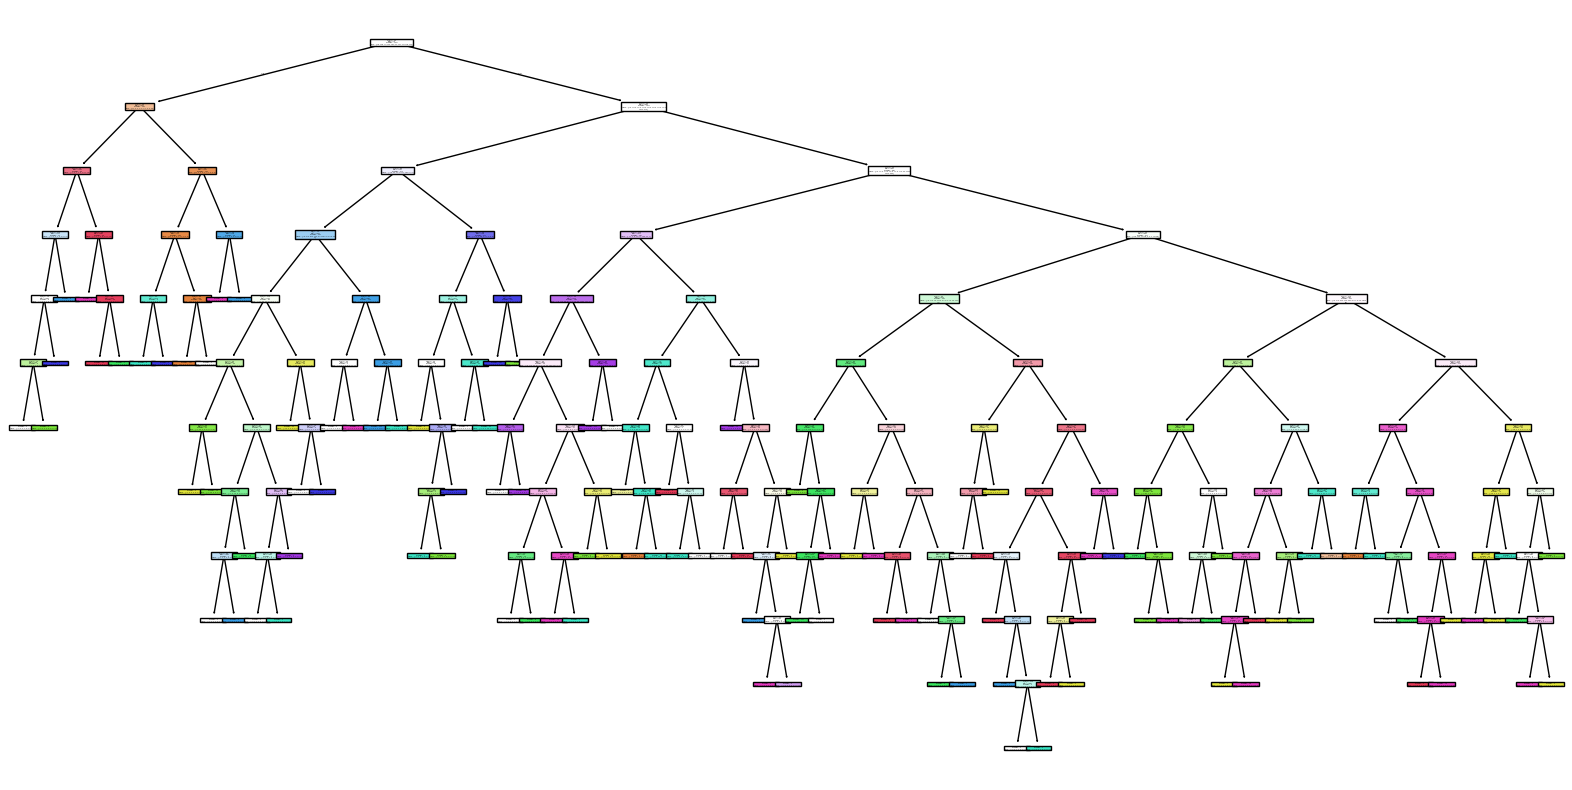

In [19]:
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, filled=True)
plt.show()

**Item 2**


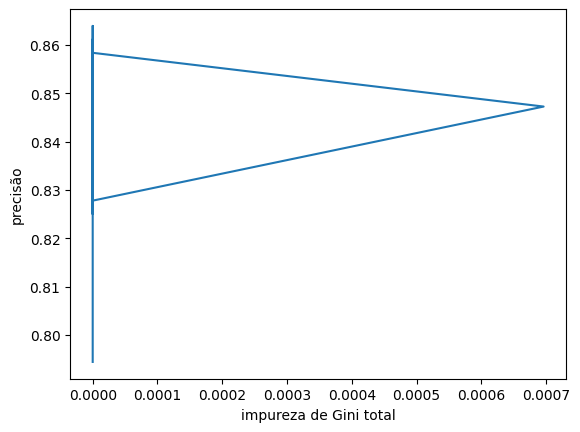

In [102]:
X_train_set = []
X_test_set = []
y_train_set = []
y_test_set = []
n = 11

for i in range(n):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
    X_train_set.append(xtrain)
    X_test_set.append(xtest)
    y_train_set.append(ytrain)
    y_test_set.append(ytest)

precisao = []
impureza = []
for i in range(n):
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=15, min_samples_leaf=1, min_samples_split=2)
    dt.fit(X_train_set[i], y_train_set[i])
    precisao.append(dt.score(X_test_set[i], y_test_set[i]))
    impureza.append(gini_impurity_tree(dt))
    
plt.plot(impureza, precisao)
plt.xlabel('impureza de Gini total')
plt.ylabel('precisão')
plt.show()


3. Analisar como a medida de impureza afeta a escolha dos atributos para dividir os dados em cada nó da árvore.
4. Entender como a medida de impureza pode ser utilizada para evitar overfitting e melhorar a generalização do modelo.

**O código abaixo varia a quantidade mínima de amostra necessária para dividir um nó para observamos o comportamento da impureza.**

In [96]:
precisao = []
impureza = []
split = []
for i in range(2, 50, 1):
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=15, min_samples_leaf=1, min_samples_split=i)
    dt.fit(X_train, y_train)
    precisao.append(dt.score(X_test, y_test))
    impureza.append(gini_impurity_tree(dt))
    split.append(i)

2. Calcular a medida de impureza para diferentes conjuntos de dados e entender como ela impacta o desempenho do modelo.

In [ ]:
plt.plot(impureza, precisao)
plt.xlabel('impureza de Gini total')
plt.ylabel('precisão')
plt.show()

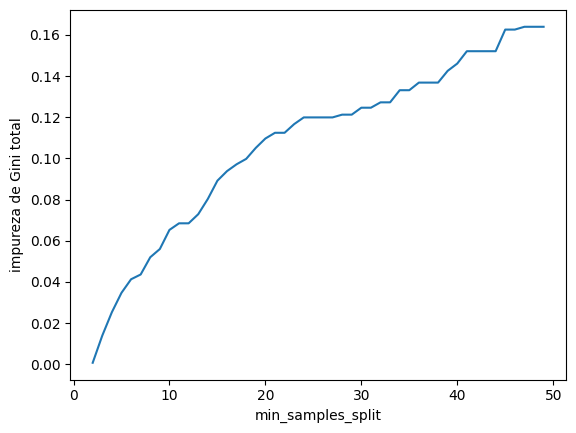

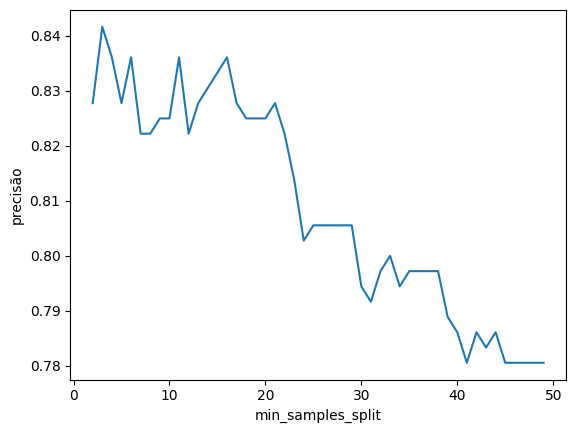

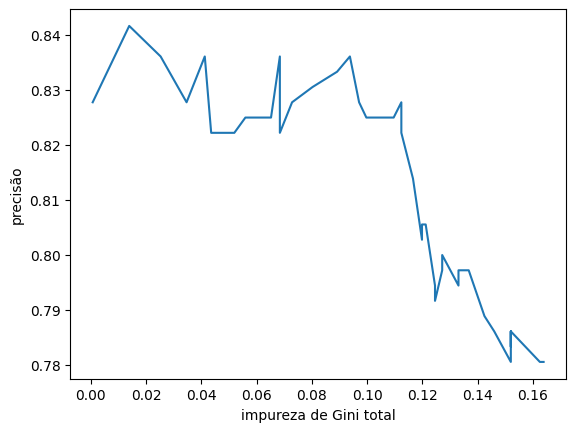

In [87]:
plt.plot(split, impureza)    
plt.xlabel('min_samples_split')
plt.ylabel('impureza de Gini total')
plt.show()

plt.plot(split, precisao, label = 'min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('precisão')
plt.show()



4. Entender como a medida de impureza pode ser utilizada para evitar overfitting e melhorar a generalização do modelo.

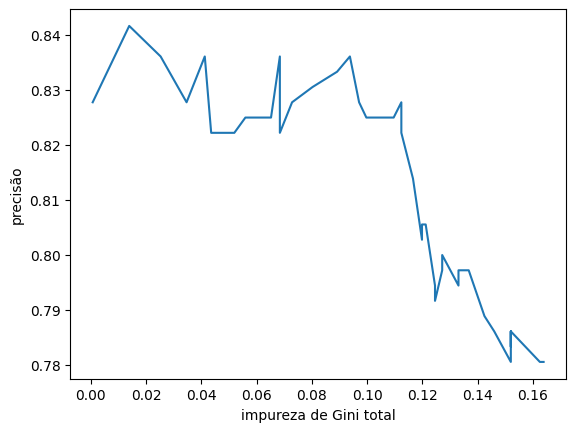

In [93]:
plt.plot(impureza, precisao)
plt.xlabel('impureza de Gini total')
plt.ylabel('precisão')
plt.show()

In [27]:

for i in range(100, 140, 2):
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i, min_samples_leaf=1, min_samples_split=2)
    dt.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print("max_depth: ", i)
    print(f"Impureza total de Gini da árvore: {gini_impurity_tree(dt):.6f}")
    print(f"Precisão da árvore de decisão: {dt.score(X_test, y_test):.6f}")
    print("\n")

max_depth:  100
Impureza total de Gini da árvore: 0.022037
Precisão da árvore de decisão: 0.822222


max_depth:  102
Impureza total de Gini da árvore: 0.022037
Precisão da árvore de decisão: 0.819444


max_depth:  104
Impureza total de Gini da árvore: 0.022733
Precisão da árvore de decisão: 0.819444


max_depth:  106
Impureza total de Gini da árvore: 0.022733
Precisão da árvore de decisão: 0.822222


max_depth:  108
Impureza total de Gini da árvore: 0.022733
Precisão da árvore de decisão: 0.822222


max_depth:  110
Impureza total de Gini da árvore: 0.022037
Precisão da árvore de decisão: 0.816667


max_depth:  112
Impureza total de Gini da árvore: 0.022037
Precisão da árvore de decisão: 0.825000


max_depth:  114
Impureza total de Gini da árvore: 0.022037
Precisão da árvore de decisão: 0.825000


max_depth:  116
Impureza total de Gini da árvore: 0.022037
Precisão da árvore de decisão: 0.836111


max_depth:  118
Impureza total de Gini da árvore: 0.022733
Precisão da árvore de decisão: 0

#### Exercício 4 - Preparação do container para deploy do modelo
Neste exercício, você irá aprender a preparar um container Docker para deploy do modelo de árvore de decisão treinado. Isso envolve criar um ambiente isolado e portável que possa ser facilmente implantado em diferentes contextos.

Você irá:
1. Criar um arquivo Dockerfile que define as instruções para construir a imagem do container.
2. Especificar as dependências necessárias para o modelo, incluindo bibliotecas e frameworks.
3. Configurar o ambiente de execução do modelo, incluindo a definição de variáveis de ambiente e a configuração de portas.
4. Construir a imagem do container utilizando o comando `docker build`.
5. Executar o container utilizando o comando `docker run` e testar a imagem.

*Dicas:*
- Certifique-se de que o arquivo Dockerfile esteja configurado corretamente para construir a imagem do container.

#### Exercício 5 - Deploy do modelo usando Flask utilizando uma imagem docker
Neste exercício, você irá aprender a deployar o modelo de árvore de decisão treinado utilizando o framework Flask e uma imagem Docker. Isso envolve criar uma API REST que permita realizar inferências com o modelo e entender como funciona o processo de deploy de um modelo em um ambiente de produção.

Você irá:
1. Criar uma aplicação Flask que carregue o modelo treinado e o utilize para realizar inferências.
2. Definir uma API REST que permita enviar solicitações de inferência ao modelo e receber respostas.
3. Configurar a aplicação Flask dentro da imagem Docker do exercício anterior.
4. Deployar a aplicação Flask no container Docker e testar a API REST.
5. Entender como funciona o processo de deploy de um modelo em um ambiente de produção, incluindo a configuração de variáveis de ambiente e a gestão de dependências.

#### Exercício 6 - Notebook cliente com inferência direto do servidor
Neste exercício, você irá aprender a criar um notebook cliente que realize inferências direto do servidor onde o modelo de árvore de decisão foi deployado. Isso envolve entender como funciona o processo de comunicação entre o cliente e o servidor e como realizar inferências com o modelo deployado.

Você irá:
1. Criar um notebook cliente.
2. Importar as bibliotecas necessárias para realizar inferências com o modelo, incluindo a biblioteca `requests` para enviar solicitações HTTP ao servidor criado no exercício anterior.
3. Configurar o notebook cliente para se conectar ao servidor onde o modelo foi deployado.
4. Enviar solicitações de inferência ao servidor utilizando a API REST criada no exercício anterior.
5. Receber as respostas do servidor e visualizar os resultados das inferências.